In [1]:
%reset -f

In [2]:
import numpy as np
import pandas as pd
import datetime
import requests
import matplotlib.pyplot as plt

api_key = pd.read_json('fmp_api_key.json').iloc[0].to_list()[0]
headers = {'Content-Type': 'application/json'}

In [3]:
### Financial Statements

def get_income_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of income_statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for income statement with revenues and expenses given in millions.  
    """  
    if period == 'FY':
        limit = 120
    else:
        limit = 400
        
    response = requests.get("https://financialmodelingprep.com/api/v3/income-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)    
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_balance_sheet_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of balance-sheet-statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for balance-sheet-statement in $millions.  
    """   
    if period == 'FY':
        limit = 120
    else:
        limit = 400
    response = requests.get("https://financialmodelingprep.com/api/v3/balance-sheet-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_cash_flow_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of cash-flow-statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for cash-flow-statement in $millions.  
    """   
    if period == 'FY':
        limit = 120
    else:
        limit = 400
    response = requests.get("https://financialmodelingprep.com/api/v3/cash-flow-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

### Financial Statements Growth
def get_income_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of income-statement-growth ('FY' only). 
            Inputs must be of string type.
    Outputs: pandas dataframe for income-statement-growth. 
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/income-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)    
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_balance_sheet_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of balance-sheet-statement-growth ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for balance-sheet-statement-growth.
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/balance-sheet-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_cash_flow_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of cash-flow-statement-growth ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for cash-flow-statement-growth.
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/cash-flow-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

### Company Financial Ratios
def get_financial_ratios_ttm(ticker):
    """ 
    Inputs: stock ticker (type: string)
    Outputs: pandas dataframe for company TTM ratios
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/ratios-ttm/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

def get_financial_ratios(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company ratios
    """   
    if period == 'FY':
        limit = 40
    else:
        limit = 140
    response = requests.get("https://financialmodelingprep.com/api/v3/ratios/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df


### Company Key Metrics
def get_key_metrics_ttm(ticker):
    """ 
    Inputs: stock ticker (type: string)
    Outputs: pandas dataframe for company TTM key metrics
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/key-metrics-ttm/" +
                       ticker + "?limit=40" + "&apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())        
        return df
    
    else:
        pass
    
def get_key_metrics(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company key metrics
    """   
    if period == 'FY':
        limit = 40
    else:
        limit = 130
        
    response = requests.get("https://financialmodelingprep.com/api/v3/key-metrics/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())
        df['date'] = pd.to_datetime(df['date'])
        df.set_index(['symbol', 'date'], inplace=True)
        
        return df
    
    else:
        pass

### Company Financial Growth
def get_financial_growth(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company financial growth
    """   
    if period == 'FY':
        limit = 20
    else:
        limit = 80
    response = requests.get("https://financialmodelingprep.com/api/v3/financial-growth/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

### Company Discounted cash flow value
def get_discounted_cash_flow(ticker):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/discounted-cash-flow/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_hist_discounted_cash_flow(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company historical discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/historical-discounted-cash-flow/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json()[0]['historicalDCF'])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date'], inplace=True)
        
    return df

def get_hist_discounted_cash_flow_daily(ticker):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company daily historical discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/historical-daily-discounted-cash-flow/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

# Earnings Calendar
def get_earnings_calendar():
    """ 
    Inputs: none
    Outputs: dataframe for earnings calendar
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/earning_calendar/" +
                       "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

# Company Profile
def get_profile(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company profile
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/profile/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())
        
        return df.transpose()
    
    else:
        pass

# Institutional holders
def get_institutional_holder(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: dataframe for institutional holders
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/institutional-holder/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())    
    
    return df

# Earnings Surprises
def get_earnings_surprises(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company earning-surprises
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/earnings-surprises/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    df['earningSurprise'] =  ((df['actualEarningResult'] - df['estimatedEarning']) / abs(df['estimatedEarning'])) * 100
    
    return df

# Key Executives
def get_key_executives(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company key executives
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/key-executives/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

### Stock Screener
- marketCapMoreThan & marketCapLowerThan : Number
- priceMoreThan & priceLowerThan : Number
- betaMoreThan & betaLowerThan : Number
- volumeMoreThan & volumeLowerThan : Number
- dividendMoreThan & dividendLowerThan : Number
- isEtf & isActivelyTrading : true/false
- sector : Consumer Cyclical - Energy - Technology - Industrials - Financial Services - Basic Materials - Communication Services - Consumer Defensive - Healthcare - Real Estate - Utilities - Industrial Goods - Financial - Services - Conglomerates
- Industry : Autos - Banks - Banks Diversified - Software - Banks Regional - Beverages Alcoholic - Beverages Brewers - Beverages - Non-Alcoholic
- Country : US - UK - MX - BR - RU - HK - CA - ...
- exchange : nyse - nasdaq - amex - euronex - tsx - etf - mutual_fund
- limit : Number

Large Cap >= 10B

2B =< Mid Cap < 10B

0.3B < Small Cap < 2B

In [ ]:
profile = get_profile('NWSA').iloc[[0,4,9,14,15,19,20,17]]
profile

In [ ]:
profile.loc['mktCap']/1.0e9

In [4]:
large_cap = 10000000000
mid_cap = 2000000000
small_cap = 300000000

params = {'sector': 'Industrials',
          #'industry': 'Specialty Industrial Machinery',
          'country': 'US',
          #'exchange': 'NASDAQ',
          'isEtf': False,
          'marketCapLowerThan': large_cap,
          'marketCapMoreThan': mid_cap,
          'volumeMoreThan': 100000,
          'limit': 300}

def get_stock_screener(params):
    response = requests.get("https://financialmodelingprep.com/api/v3/stock-screener?" 
                            + 'marketCapLowerThan=' + str(params['marketCapLowerThan'])
                            + '&marketCapMoreThan=' + str(params['marketCapMoreThan'])
                            + '&volumeMoreThan=' + str(params['volumeMoreThan'])
                            + '&sector=' + str(params['sector'])
                            #+ '&industry=' + str(params['industry'])
                            + '&country=' + str(params['country'])
                            #+ '&exchange=' + str(params['exchange'])
                            + '&isEtf=' + str(params['isEtf'])
                            + '&limit=' + str(params['limit'])
                            + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df.set_index(['symbol'], inplace=True)
    
    return df

### Initial screening by sector and market cap

In [5]:
screened_tickers = get_stock_screener(params)
tickers = screened_tickers.index.to_list()
print(tickers[:])
print('\n')
print("number of screened tickers =", len(tickers))

['ACM', 'RHI', 'NLSN', 'MIDD', 'CSL', 'ALK', 'HDS', 'HII', 'KNX', 'OSK', 'SITE', 'WMS', 'ITT', 'ADT', 'IAA', 'OA', 'WWD', 'TTEK', 'VRT', 'DCI', 'MTZ', 'LECO', 'BLD', 'AZEK', 'SPCE', 'WSC', 'JBLU', 'LPX', 'LSTR', 'EME', 'BWXT', 'GWR', 'SRCL', 'SAIA', 'TKR', 'AYI', 'UPWK', 'MSA', 'CFX', 'RBC', 'RXN', 'MMS', 'MAN', 'ASGN', 'AL', 'CR', 'KBR', 'CAR', 'TNET', 'EXPO', 'GTLS', 'FLS', 'CW', 'SPR', 'MSM', 'VMI', 'ROLL', 'FCN', 'GTES', 'CLH', 'HXL', 'SSD', 'ULCC', 'AEIS', 'AWI', 'SNDR', 'APG', 'NAV', 'WCC', 'JBT', 'MRCY', 'PSN', 'BE', 'R', 'ALGT', 'FCEL', 'REZI', 'ENS', 'WTS', 'BCO', 'AIMC', 'BECN', 'AJRD', 'HI', 'FELE', 'KEX', 'AIT', 'AAON', 'SAVE', 'BMCH', 'IBP', 'ABM', 'KFY', 'KMT', 'KTOS', 'CVON', 'CWST', 'ATKR', 'ENR', 'GATX', 'NSP', 'AQUA', 'WERN', 'KLXI', 'FLR', 'MATX', 'TRN', 'RCII', 'PRLB', 'EAF', 'TEX', 'DOOR', 'ACA', 'DY', 'PRG', 'ROCK', 'HRI', 'FIX', 'JELD', 'BRC', 'ARNC', 'VVNT', 'ATI', 'AVAV', 'MIC', 'FLOW', 'BMI', 'MOG-A', 'ADSW', 'SPXC', 'SKYW', 'B', 'PAY', 'MLHR', 'AMRC', 'MLI', 

### Industries

In [6]:
# find industries of the screened stock tickers
def get_industries_from_profiles(tickers):
    
    temp = []

    for ticker in tickers:
        df_industry = get_profile(ticker).loc[['symbol', 'industry']]
        temp.append(df_industry)
    
    df = pd.concat(temp, axis=1)
    df = df.transpose()
    df.columns = ['symbol', 'industry']
    df.reset_index(drop=True, inplace=True)
    
    return df

In [7]:
df_industry = get_industries_from_profiles(tickers)
df_industry['industry'].value_counts()

Specialty Industrial Machinery         25
Building Products & Equipment          14
Aerospace & Defense                    14
Engineering & Construction             11
Rental & Leasing Services              10
Electrical Equipment & Parts           10
Security & Protection Services          7
Staffing & Employment Services          7
Airlines                                6
Industrial Distribution                 5
Integrated Freight & Logistics          4
Metal Fabrication                       4
Tools & Accessories                     4
Waste Management                        4
Trucking                                4
Farm & Heavy Construction Machinery     4
Specialty Business Services             3
Consulting Services                     3
Marine Shipping                         2
Business Services                       2
Railroads                               2
Pollution & Treatment Controls          2
Business Equipment & Supplies           1
Industrial Products               

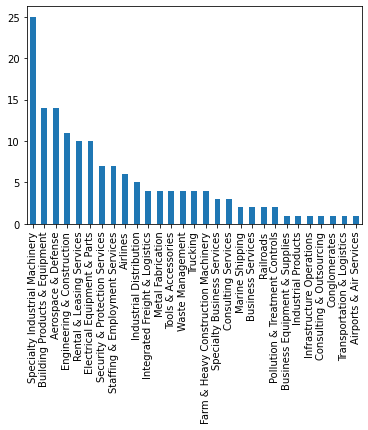

In [8]:
df_industry['industry'].value_counts().plot.bar();

### Key Metrics

In [9]:
def get_key_metrics_tickers(tickers, period):
    """
    Input: a list of stock tickers and period ('FY', or 'quarter')
    Output: pandas dataframe for selected key metrics
    """ 
    metrics = [
        'peRatio',
        'enterpriseValueOverEBITDA',
        'evToSales',
        'freeCashFlowYield',
        'debtToEquity',
        'roic',
        'roe',
        'salesGeneralAndAdministrativeToRevenue',
        'researchAndDdevelopementToRevenue'
    ]
    
    dataframes = []
    
    for ticker in (tickers):
        df = get_key_metrics(ticker, period)
        dataframes.append(df)
    df = pd.concat(dataframes)
    df['peRatio'] = pd.to_numeric(df['peRatio'])
    df['enterpriseValueOverEBITDA'] = pd.to_numeric(df['enterpriseValueOverEBITDA'])
    df['evToSales'] = pd.to_numeric(df['evToSales'])
    df['freeCashFlowYield'] = pd.to_numeric(df['freeCashFlowYield'])
    df['debtToEquity'] = pd.to_numeric(df['debtToEquity'])
    df['roic'] = pd.to_numeric(df['roic'])
    df['roe'] = pd.to_numeric(df['roe'])
    df['salesGeneralAndAdministrativeToRevenue'] = pd.to_numeric(df['salesGeneralAndAdministrativeToRevenue'])
    df['researchAndDdevelopementToRevenue'] = pd.to_numeric(df['researchAndDdevelopementToRevenue'])
    df_metrics = df[metrics]
    df_metrics = df_metrics.rename(columns={'enterpriseValueOverEBITDA': 'EV/EBITDA', 
                       'salesGeneralAndAdministrativeToRevenue': 'SG&A/revenue', 
                       'researchAndDdevelopementToRevenue': 'R&D/revenue' })
    
    return df_metrics


def make_comparison_plot(df_0, ticker_a, ticker_b, metrics):
    
    df_a = df_0.loc[ticker_a][metrics][:20].sort_index()
    df_b = df_0.loc[ticker_b][metrics][:20].sort_index()
    df = pd.concat([df_a, df_b], axis=1)
    df.columns = [metrics + '_' + ticker_a, metrics + '_' + ticker_b]
    ax = df.plot.bar(figsize=(10,7), grid=True)
    ax.set_xlabel('')
    ax.set_ylabel(metrics, fontsize=14)
    plt.tight_layout()
    
    return ax   

### Tickers selection
get quarterly key metrics for given sector and market cap

In [10]:
df_metrics_quarter = get_key_metrics_tickers(tickers, 'quarter')

In [ ]:
#tickers_selected = df_metrics_quarter.index.get_level_values(0).unique().to_list()
#print("number of selected tickers =", len(tickers_selected))

In [24]:
# get interquartile range of P/E for the last four quarters
df_last4q = df_metrics_quarter.groupby('symbol').head(4)
pe_25 = df_last4q['peRatio'].groupby('symbol').min().describe()['25%']
pe_75 = df_last4q['peRatio'].groupby('symbol').max().describe()['75%']
IQR = pe_75 - pe_25
print("pe_25=", pe_25)
print("pe_75=", pe_75)
print("interquartile range=", IQR)

pe_25= -22.854212437963852
pe_75= 69.70810608836625
interquartile range= 92.5623185263301


In [27]:
# Remove outliers
tickers_ignored = set(df_last4q[(df_last4q['peRatio'] <= pe_25 - IQR) | (df_last4q['peRatio'] >= pe_75 + IQR)].index.get_level_values(0).unique())
all_tickers = set(df_metrics_quarter.index.get_level_values(0).unique())
tickers_selected = list(all_tickers - tickers_ignored)
print(tickers_selected)
print('\n')
print("number of selected tickers =", len(tickers_selected))

['RBC', 'PRLB', 'MSA', 'CR', 'WSC', 'MSM', 'GTES', 'OA', 'MIDD', 'SAIA', 'AWI', 'SPCE', 'HLIO', 'SKYW', 'RXN', 'FELE', 'AMRC', 'KMT', 'FLOW', 'HUBG', 'SNDR', 'FSS', 'FTAI', 'FCN', 'BDC', 'KBR', 'BRC', 'ROCK', 'AEIS', 'TKR', 'AYI', 'ACA', 'TRN', 'ADT', 'IBP', 'OSK', 'KEX', 'JBLU', 'CSL', 'KNX', 'SSD', 'MRCY', 'EAF', 'MMS', 'PRG', 'HI', 'SAVE', 'MTZ', 'BWXT', 'LPX', 'WTS', 'ARNC', 'CYRX', 'AL', 'ASGN', 'AIMC', 'ALK', 'SPXC', 'CLH', 'FIX', 'MATX', 'CFX', 'EXPO', 'VMI', 'FLR', 'CAR', 'ACM', 'WCC', 'BECN', 'MLI', 'ALGT', 'TTEK', 'TEX', 'R', 'NAV', 'ATKR', 'GATX', 'DY', 'ABM', 'GWR', 'SPR', 'FCEL', 'GTLS', 'HII', 'AAON', 'RHI', 'VVNT', 'WBT', 'MLHR', 'HRI', 'LECO', 'JBT', 'TNET', 'BMCH', 'AJRD', 'WERN', 'SSW', 'RCII', 'AQUA', 'FWRD', 'DCI', 'MWA', 'IAA', 'SITE', 'PSN', 'WWD', 'MOG-A', 'CTOS', 'EME', 'VRT', 'LSTR', 'AYR', 'APG', 'CW', 'ENR', 'BMI', 'BLD', 'BE', 'MIC', 'ATI']


number of selected tickers = 120


In [28]:
# Selected tickers' statistic
quarterly_stat = df_metrics_quarter.loc[tickers_selected].describe().transpose()
quarterly_stat

,count,mean,std,min,25%,50%,75%,max
peRatio,9249.0,23.894482,405.282508,-4649.975453,9.310942,15.491072,22.699653,28802.026930
EV/EBITDA,9296.0,38.960134,623.372779,-10291.932740,21.403265,32.714804,45.477412,49904.400000
evToSales,9270.0,16.296590,286.917180,-135.429182,2.807641,4.315030,6.645942,15552.784695
freeCashFlowYield,9268.0,-0.422299,40.996305,-3945.904222,-0.007939,0.010183,0.026505,60.422005
debtToEquity,9294.0,-0.404841,98.601288,-9454.138122,0.119005,0.423998,0.910646,154.295455
roic,9246.0,0.031792,0.704940,-52.496144,0.015760,0.030535,0.048042,27.147860
roe,9294.0,1.197234,113.043786,-135.340517,0.016487,0.031861,0.048352,10896.591160
SG&A/revenue,9270.0,0.201332,8.486328,-212.336283,0.070133,0.138352,0.213952,582.148992
R&D/revenue,9270.0,0.036432,1.524201,-1.672411,0.000000,0.000000,0.000000,144.042017


(-1000.0, 1500.0)

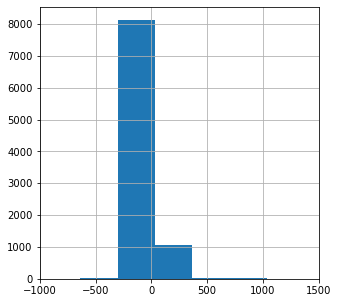

In [51]:
fig, ax = plt.subplots(figsize=(5,5))
df_metrics_quarter.loc[tickers_selected]['peRatio'].hist(bins=100)
ax.set_xlim(-1000, 1500)

### Get key metrics for selected tickers
FY key metrics are used to rank the stocks

In [29]:
df_metrics = get_key_metrics_tickers(tickers_selected, 'FY')
df_metrics.head()

peRatio  EV/EBITDA  evToSales  freeCashFlowYield  \
symbol date                                                             
RBC    2021-01-02  26.644559  13.141209   1.645476           0.075451   
       2019-12-28  14.236752   8.706055   1.305639           0.092939   
       2018-12-29  13.930364   8.742746   1.173661           0.088521   
       2017-12-30  16.370892   9.388615   1.305627           0.065013   
       2017-01-07  15.431580   7.453269   0.954777           0.115962   

                   debtToEquity      roic       roe  SG&A/revenue  R&D/revenue  
symbol date                                                                     
RBC    2021-01-02      0.090802  0.074330  0.075865           0.0          0.0  
       2019-12-28      0.483561  0.090719  0.101612           0.0          0.0  
       2018-12-29      0.565505  0.088064  0.100065           0.0          0.0  
       2017-12-30      0.447173  0.089794  0.091593           0.0          0.0  
       2017-01-07      0.067223  0.087503  0.102552           0.0          0.0

In [54]:
print("number of unique tickers =", df_metrics.dropna().index.get_level_values(0).nunique())

number of unique tickers = 118


In [55]:
FY_stat = df_metrics.dropna().describe().transpose()
FY_stat

,count,mean,std,min,25%,50%,75%,max
peRatio,2633.0,25.594493,440.247185,-9178.982680,7.980297,15.470162,22.761127,10698.504229
EV/EBITDA,2633.0,-171.376263,8995.592969,-461262.456441,5.332827,8.457518,12.008755,3640.833487
evToSales,2633.0,38.315265,1182.335953,-137.179456,0.647346,1.039578,1.672102,50160.959885
freeCashFlowYield,2633.0,0.853276,34.059804,-567.375887,0.000230,0.043533,0.081149,1463.519313
debtToEquity,2633.0,-2.504099,185.056294,-9454.138122,0.141712,0.479015,0.998517,832.000000
roic,2633.0,14.863084,756.965402,-2.394634,0.061990,0.114994,0.177236,38842.094656
roe,2633.0,22.413775,818.049931,-63.814815,0.062770,0.120913,0.174419,33568.286588
SG&A/revenue,2633.0,0.337495,10.338239,-183.501524,0.034809,0.130007,0.206264,489.882353
R&D/revenue,2633.0,0.283696,13.018340,0.000000,0.000000,0.000000,0.000000,667.046218


In [56]:
FY_stat['50%'].to_frame().transpose()

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
50%,15.470162,8.457518,1.039578,0.043533,0.479015,0.114994,0.120913,0.130007,0.0


In [65]:
df_metrics_sorted = df_metrics.dropna().groupby(level=0).median().sort_values(by=['peRatio', 'EV/EBITDA', 'evToSales', 'debtToEquity'])

(-1000.0, 1500.0)

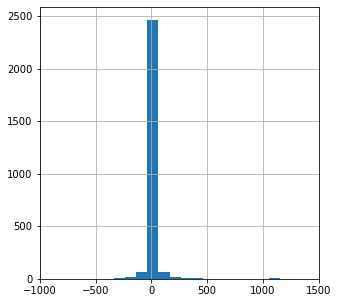

In [63]:
fig, ax = plt.subplots(figsize=(5,5))
df_metrics.loc[tickers_selected]['peRatio'].hist(bins=200)
ax.set_xlim(-1000, 1500)

In [68]:
df_metrics_filtered = df_metrics_sorted[(df_metrics_sorted['peRatio']>-250) & (df_metrics_sorted['peRatio']<500)]

In [110]:
df_metrics_filtered[50:60]

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
symbol,,,,,,,,,
RBC,14.938273,8.144048,1.074059,0.092186,0.497330,0.117857,0.108517,0.000000,0.000000
FIX,14.983042,9.240837,0.391585,0.058280,0.053724,0.128564,0.092153,0.140779,0.000000
FSS,15.020262,10.303768,1.089182,0.045615,0.329985,0.145504,0.135846,0.171604,0.000000
VMI,15.155358,7.599283,0.882550,0.032420,0.642562,0.144477,0.138843,0.163676,0.000000
HII,15.446754,7.575496,0.923254,0.068557,0.870632,0.141962,0.271805,0.095935,0.000000
CSL,15.626795,8.682745,0.947446,0.063908,0.402840,0.142310,0.128798,0.117843,0.009092
SNDR,15.929057,6.447157,0.816089,0.027566,0.152691,0.097104,0.114550,0.046140,0.000000
HI,16.248304,10.603080,1.613638,0.078462,0.873085,0.147629,0.187511,0.000000,0.000000
BMI,16.374744,7.624825,1.023846,0.034100,0.053640,0.170434,0.125237,0.238752,0.000000


In [108]:
'RBC' in df_metrics_filtered.index.get_level_values(0)

True

In [70]:
df_metrics_filtered.dropna().groupby(level=0).mean().sort_values(by=['freeCashFlowYield', 'roic', 'roe'], ascending=False).head()

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
symbol,,,,,,,,,
IAA,17.207153,10.845073,2.939758,0.542416,0.763743,0.185489,0.227876,0.049555,0.000000
VVNT,-1.682288,-23.236766,2.630962,0.241751,-1.893372,-0.109608,0.325573,0.211885,0.000000
EAF,4.442643,5.600393,2.960426,0.217114,-2.263565,0.618542,-0.935387,0.045512,0.002373
SPXC,2.429027,4.214836,0.363144,0.138365,0.809741,0.078920,0.093126,0.189982,0.000000
CAR,5.137600,3.699380,1.275954,0.125207,1.552406,0.074272,0.131707,0.151750,0.000000


In [71]:
df_metrics_filtered.dropna().groupby(level=0).median().sort_values(by=['debtToEquity'], ascending=False).head(10)

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
symbol,,,,,,,,,
WBT,29.138520,15.900826,2.414526,-0.051624,6.347157,0.138214,0.320238,0.196965,0.000000
HRI,17.292023,5.255647,1.619789,-0.090329,4.894630,0.028194,0.036316,0.000000,0.000000
GATX,9.223279,9.568693,3.272129,-0.168201,3.143524,0.044485,0.126799,0.122364,0.000000
ADT,-10.669859,7.725412,3.267880,0.117295,2.939748,0.021545,-0.133198,0.274410,0.000000
AQUA,95.538140,15.483470,2.193006,0.006368,2.604719,0.045315,0.013663,0.139711,0.011222
ATKR,12.037801,9.338778,1.063269,0.104449,2.445309,0.170927,0.402479,0.124331,0.000000
AL,10.429150,10.278773,9.519733,-0.629179,2.400488,0.055193,0.092349,0.076856,0.000000
SSW,5.932223,8.918699,6.355610,-0.236027,2.378015,0.023924,0.075204,0.000000,0.000000
R,11.816418,4.097320,0.823385,-0.222380,2.104886,0.040791,0.126633,0.101659,0.000000


### Check interesting stocks
quarterly key metrics

In [111]:
ticker_of_interest = 'RBC'

In [112]:
profile = get_profile(ticker_of_interest)
profile.iloc[[0, 4, 9, 14, 15, 17, 19, 20,]]

,0
symbol,RBC
mktCap,5817285120
currency,USD
exchangeShortName,NYSE
industry,Specialty Industrial Machinery
description,"Regal Beloit Corporation, together with its su..."
sector,Industrials
country,US


In [113]:
df_stock_metrics = df_metrics_quarter.loc[ticker_of_interest]
df_stock_metrics.head()

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
date,,,,,,,,,
2021-01-02,6.352850,12.487363,1.563605,0.079113,0.090802,0.074330,0.075865,0.0,0.0
2020-09-26,14.096970,28.338212,4.598417,-0.001075,0.095002,0.024664,0.027261,0.0,0.0
2020-06-27,30.514136,52.319304,6.534756,0.022567,0.485145,0.011985,0.012117,0.0,0.0
2020-03-28,13.190961,31.163587,4.354922,0.037988,0.600854,0.017476,0.020171,0.0,0.0
2019-12-28,23.467032,44.587269,5.786319,0.035472,0.483561,0.015942,0.015610,0.0,0.0


In [114]:
quarterly_stat.loc[['peRatio', 'EV/EBITDA']]

,count,mean,std,min,25%,50%,75%,max
peRatio,9249.0,23.894482,405.282508,-4649.975453,9.310942,15.491072,22.699653,28802.02693
EV/EBITDA,9296.0,38.960134,623.372779,-10291.932740,21.403265,32.714804,45.477412,49904.40000


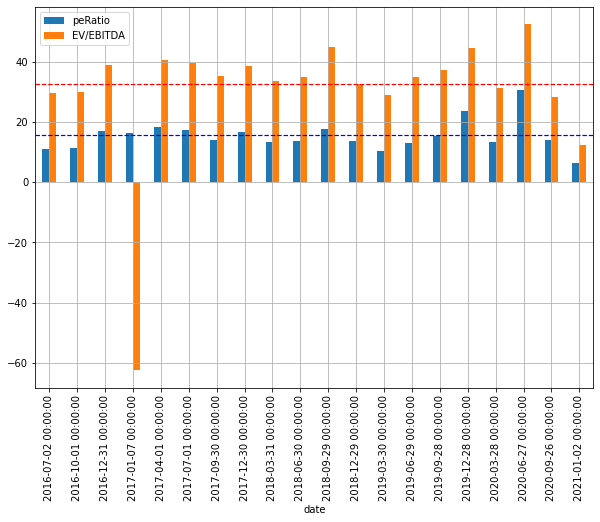

In [115]:
df_stock_metrics[['peRatio', 'EV/EBITDA']][:20].sort_index().plot.bar(grid=True, figsize=(10,7));
plt.axhline(y = quarterly_stat.loc['peRatio']['50%'], lw=1.2,ls='--', color='b');
plt.axhline(y = quarterly_stat.loc['EV/EBITDA']['50%'], lw=1.2,ls='--', color='r');

In [116]:
quarterly_stat.loc[['evToSales']]

,count,mean,std,min,25%,50%,75%,max
evToSales,9270.0,16.29659,286.91718,-135.429182,2.807641,4.31503,6.645942,15552.784695


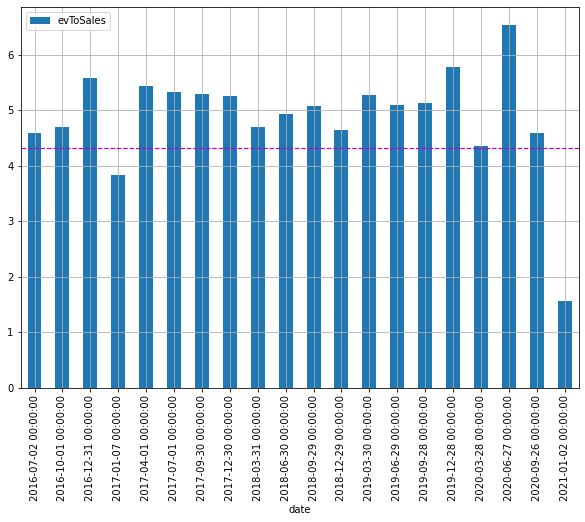

In [117]:
df_stock_metrics['evToSales'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['evToSales']['50%'], lw=1.2,ls='--', color='m');

In [118]:
quarterly_stat.loc[['freeCashFlowYield']]

,count,mean,std,min,25%,50%,75%,max
freeCashFlowYield,9268.0,-0.422299,40.996305,-3945.904222,-0.007939,0.010183,0.026505,60.422005


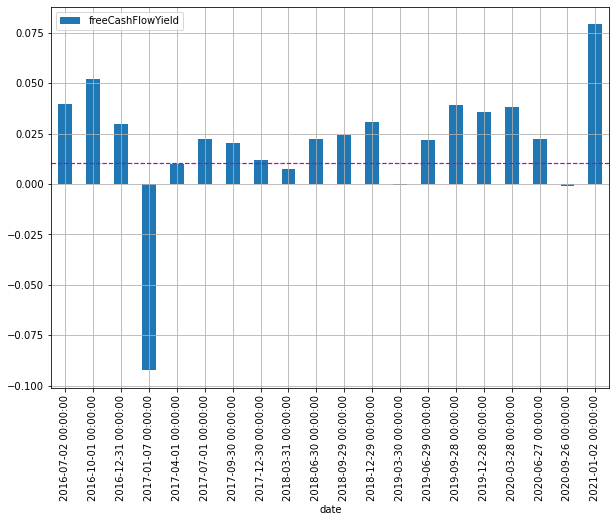

In [119]:
df_stock_metrics['freeCashFlowYield'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['freeCashFlowYield']['50%'], lw=1.2,ls='--', color='m');

In [120]:
quarterly_stat.loc[['roic', 'roe']]

,count,mean,std,min,25%,50%,75%,max
roic,9246.0,0.031792,0.704940,-52.496144,0.015760,0.030535,0.048042,27.14786
roe,9294.0,1.197234,113.043786,-135.340517,0.016487,0.031861,0.048352,10896.59116


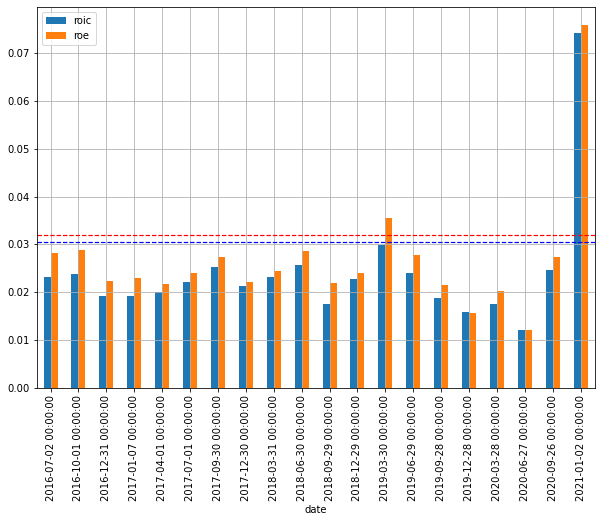

In [121]:
df_stock_metrics[['roic', 'roe']][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['roic']['50%'], lw=1.2,ls='--', color='b');
plt.axhline(y = quarterly_stat.loc['roe']['50%'], lw=1.2,ls='--', color='r');

In [122]:
quarterly_stat.loc[['debtToEquity']]

,count,mean,std,min,25%,50%,75%,max
debtToEquity,9294.0,-0.404841,98.601288,-9454.138122,0.119005,0.423998,0.910646,154.295455


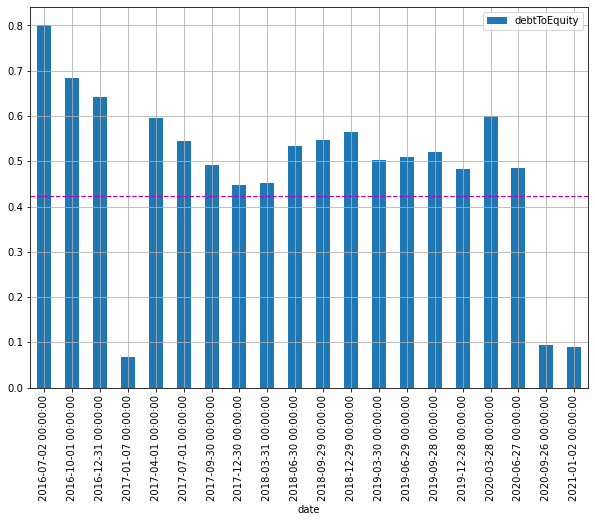

In [123]:
df_stock_metrics['debtToEquity'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['debtToEquity']['50%'], lw=1.2,ls='--', color='m');

### Income Statement

In [124]:
df_income = get_income_statement(ticker_of_interest, 'FY')
df_income.head()

reportedCurrency fillingDate         acceptedDate period  \
symbol date                                                                  
RBC    2021-01-02              USD  2021-03-02  2021-03-02 16:03:40     FY   
       2019-12-28              USD  2020-02-26  2020-02-26 17:17:15     FY   
       2018-12-29              USD  2019-02-26  2019-02-26 17:08:21     FY   
       2017-12-30              USD  2018-02-27  2018-02-27 15:58:41     FY   
       2017-01-07              USD  2017-03-01  2017-03-01 15:37:23     FY   

                      revenue  costOfRevenue  grossProfit  grossProfitRatio  \
symbol date                                                                   
RBC    2021-01-02  2907000000     2098000000    808000000          0.277950   
       2019-12-28  3238000000     2366600000    871400000          0.269117   
       2018-12-29  3645600000     2677800000    967800000          0.265471   
       2017-12-30  3360300000     2464700000    895600000          0.266524   
       2017-01-07  3224000000     2359000000    865000000          0.268300   

                   researchAndDevelopmentExpenses  \
symbol date                                         
RBC    2021-01-02                             0.0   
       2019-12-28                             0.0   
       2018-12-29                             0.0   
       2017-12-30                             0.0   
       2017-01-07                             0.0   

                   generalAndAdministrativeExpenses  ...  \
symbol date                                          ...   
RBC    2021-01-02                               0.0  ...   
       2019-12-28                               0.0  ...   
       2018-12-29                               0.0  ...   
       2017-12-30                               0.0  ...   
       2017-01-07                               0.0  ...   

                   incomeBeforeTaxRatio  incomeTaxExpense  netIncome  \
symbol date                                                            
RBC    2021-01-02              0.085999          56000000  193000000   
       2019-12-28              0.093823          61200000  238900000   
       2018-12-29              0.080151          56400000  231200000   
       2017-12-30              0.082493          59100000  213000000   
       2017-01-07              0.082506          57000000  209000000   

                   netIncomeRatio      eps  epsdiluted  weightedAverageShsOut  \
symbol date                                                                     
RBC    2021-01-02        0.066391  4.82500     4.82500               40000000   
       2019-12-28        0.073780  5.66114     5.66114               42000000   
       2018-12-29        0.063419  5.26651     5.26651               43000000   
       2017-12-30        0.063387  4.74388     4.74388               44000000   
       2017-01-07        0.064826  4.55000     4.55000               44000000   

                   weightedAverageShsOutDil  \
symbol date                                   
RBC    2021-01-02                  40000000   
       2019-12-28                  42000000   
       2018-12-29                  43000000   
       2017-12-30                  44000000   
       2017-01-07                  44000000   

                                                                link  \
symbol date                                                            
RBC    2021-01-02  https://www.sec.gov/Archives/edgar/data/82811/...   
       2019-12-28  https://www.sec.gov/Archives/edgar/data/82811/...   
       2018-12-29  https://www.sec.gov/Archives/edgar/data/82811/...   
       2017-12-30  https://www.sec.gov/Archives/edgar/data/82811/...   
       2017-01-07  https://www.sec.gov/Archives/edgar/data/82811/...   

                                                           finalLink  
symbol date                                                           
RBC    2021-01-02  https://www.sec.gov/Archives/edgar/data/82811/...  
   

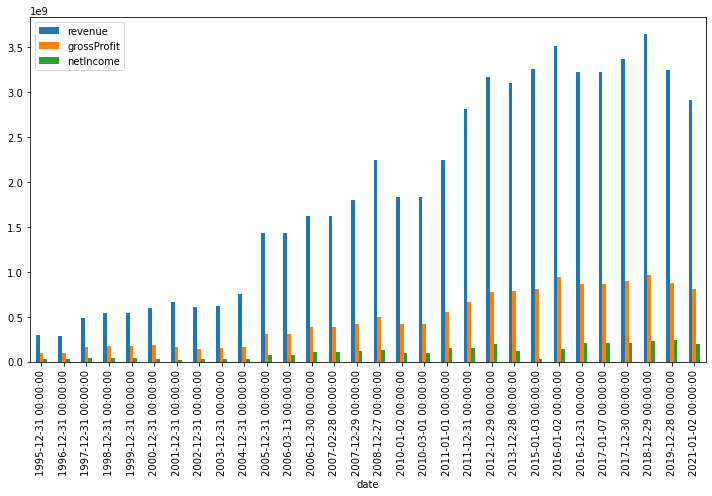

In [125]:
df_income.loc[ticker_of_interest][['revenue', 'grossProfit', 'netIncome']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

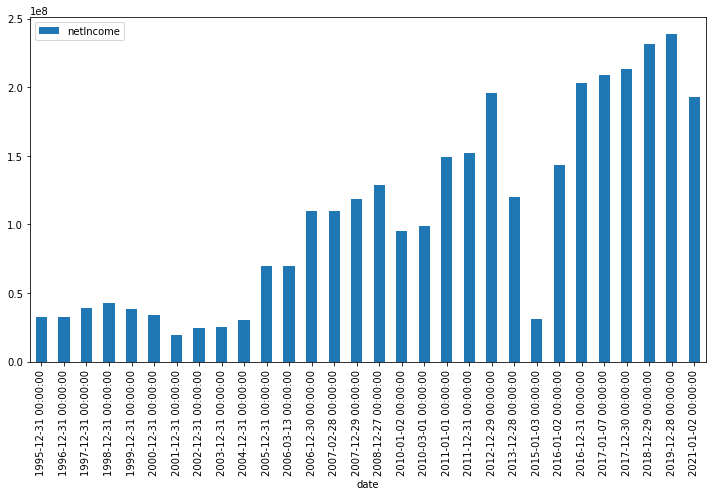

In [126]:
df_income.loc[ticker_of_interest][['netIncome']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

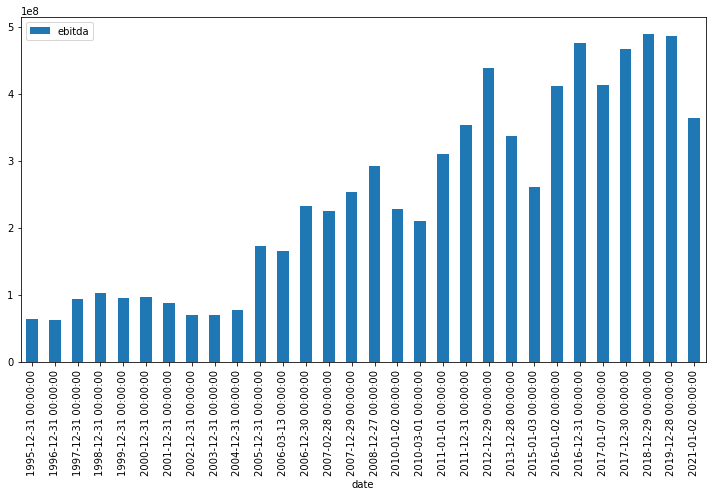

In [127]:
df_income.loc[ticker_of_interest][['ebitda']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

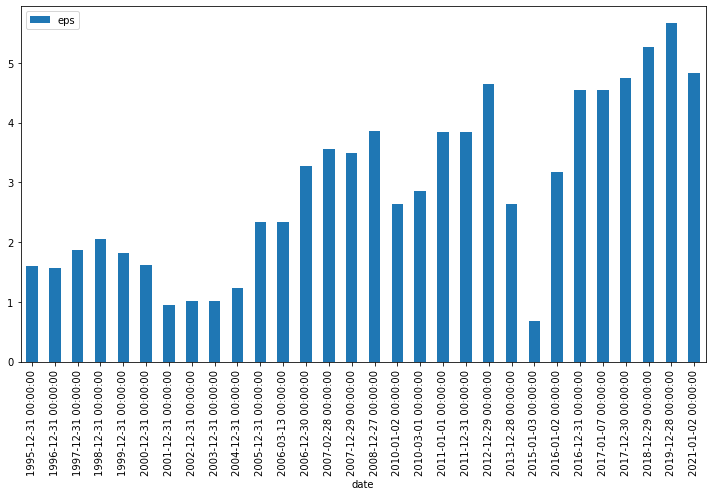

In [128]:
df_income.loc[ticker_of_interest][['eps']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

### Cashflow Statement

In [129]:
df_cashflow = get_cash_flow_statement(ticker_of_interest, 'FY')
df_cashflow.head()

reportedCurrency fillingDate         acceptedDate period  \
symbol date                                                                  
RBC    2021-01-02              USD  2021-03-02  2021-03-02 16:03:40     FY   
       2019-12-28              USD  2020-02-26  2020-02-26 17:17:15     FY   
       2018-12-29              USD  2019-02-26  2019-02-26 17:08:21     FY   
       2017-12-30              USD  2018-02-27  2018-02-27 15:58:41     FY   
       2017-01-07              USD  2017-03-01  2017-03-01 15:37:23     FY   

                   netIncome  depreciationAndAmortization  deferredIncomeTax  \
symbol date                                                                    
RBC    2021-01-02  193000000                   84000000.0        -16000000.0   
       2019-12-28  238900000                  134500000.0         22400000.0   
       2018-12-29  231200000                  142400000.0         13200000.0   
       2017-12-30  213000000                  137200000.0         -9700000.0   
       2017-01-07  209000000                   93000000.0         -1000000.0   

                   stockBasedCompensation  changeInWorkingCapital  \
symbol date                                                         
RBC    2021-01-02               9000000.0             -18200000.0   
       2019-12-28              13000000.0             -87000000.0   
       2018-12-29              16900000.0             271800000.0   
       2017-12-30              13600000.0              31400000.0   
       2017-01-07              13000000.0                600000.0   

                   accountsReceivables  ...  \
symbol date                             ...   
RBC    2021-01-02           29000000.0  ...   
       2019-12-28           70000000.0  ...   
       2018-12-29          -56000000.0  ...   
       2017-12-30            1000000.0  ...   
       2017-01-07            1000000.0  ...   

                   netCashUsedProvidedByFinancingActivities  \
symbol date                                                   
RBC    2021-01-02                                -147000000   
       2019-12-28                                -397400000   
       2018-12-29                                 -17700000   
       2017-12-30                                -390600000   
       2017-01-07                                -376000000   

                   effectOfForexChangesOnCash  netChangeInCash  \
symbol date                                                      
RBC    2021-01-02                         0.0      279000000.0   
       2019-12-28                  -2600000.0       82800000.0   
       2018-12-29                  -8100000.0      109000000.0   
       2017-12-30                  11600000.0     -144900000.0   
       2017-01-07                         0.0       31000000.0   

                   cashAtEndOfPeriod  cashAtBeginningOfPeriod  \
symbol date                                                     
RBC    2021-01-02        611000000.0              331000000.0   
       2019-12-28        331400000.0              248600000.0   
       2018-12-29        248600000.0              139600000.0   
       2017-12-30        139600000.0              284500000.0   
       2017-01-07        284000000.0              252000000.0   

                   operatingCashFlow  capitalExpenditure  freeCashFlow  \
symbol date                                                              
RBC    2021-01-02          435000000         -47000000.0     388000000   
       2019-12-28          408500000         -92400000.0     316100000   
       2018-12-29          362700000         -77600000.0     285100000   
       2017-12-30          291900000         -65200000.0     226700000   
       2017-01-07          439000000         -65000000.0     374000000   

                                                                link  \
symbol date                                                            
RBC    2021-01-02  https://www.sec.gov/Archives/edgar/data/82811/...   


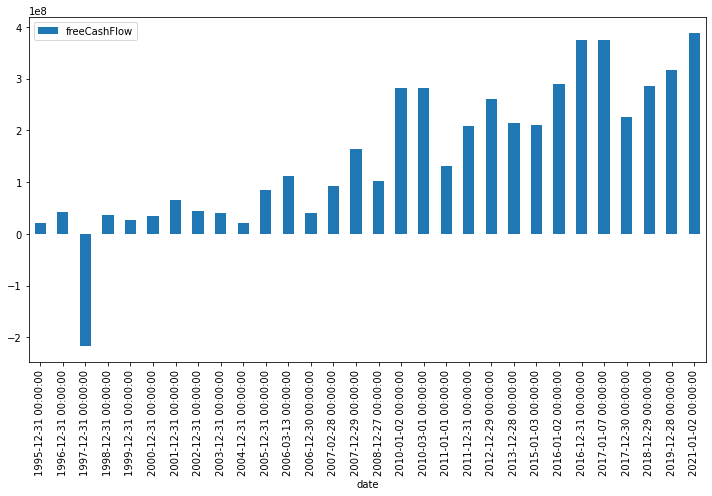

In [130]:
df_cashflow.loc[ticker_of_interest][['freeCashFlow']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

### Comparison
check for both FY and quarter

In [ ]:
metrics = df_metrics.columns.to_list()

for metric in metrics:
    make_comparison_plot(df_metrics_quarter, 'CW', 'RBC', metric);

In [ ]:
earning_calender = get_earnings_calendar()

In [ ]:
earning_calender.loc['RBC']